# 1. Analysis of Obama's Speeches

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


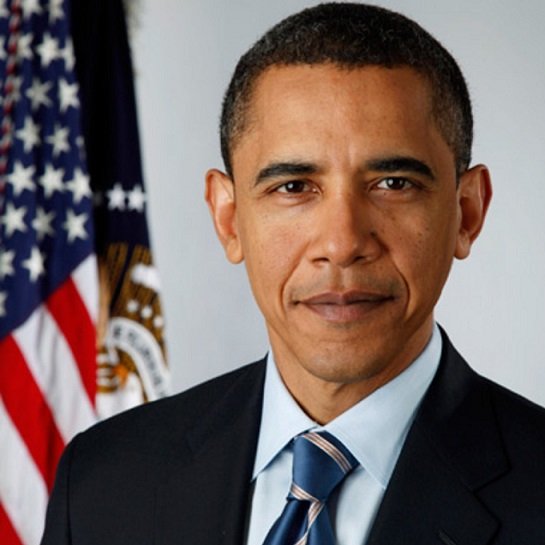

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img= cv2.imread('/content/drive/My Drive/obama.jpg') 
cv2_imshow(img) 

We are provided with above 400 speeches of President Barack Obama in PDF format. The aim is to:

* Analyze the speeches using text mining concepts
*  Timeline study of the speeches 

## Import packages and data

In [ ]:
!pip install tika

In [ ]:
!pip install lexical_diversity

In [ ]:
import re,os
import pandas as pd
import numpy as np
from tika import parser
import matplotlib.pyplot as plt
from pprint import pprint
import datetime
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from lexical_diversity import lex_div as ld

Here, we are loading the pdfs containing speeches from the drive. We will read each of the files, and save them, along with the contents, in a dataframe.
This dataframe is then saved as csv, for later use, as reading the pdfs is tie consuming.

In [ ]:
speech_path= '/content/drive/My Drive/Obama speeches pdf'

In [ ]:
pdf_files= os.listdir(speech_path)
pdf_files

['27 Jul 2004_Barack Obama - 2004 DNC Address.pdf',
 '06 Jan 2005_Barack Obama - Senate Speech on Ohio Electoral Vote.pdf',
 '04 Jun 2005_Barack Obama - Knox College Commencement.pdf',
 '25 Oct 2005_Barack Obama - Rosa Parks.pdf',
 '15 Dec 2005_Barack Obama - Senate Floor Speech on the Patriot Act.pdf',
 '31 Jan 2006_Barack Obama - Senate Floor Coretta King.pdf',
 '20 Jul 2006_Barack Obama - Senate Floor Speech on Voting Rights Act Renewal.pdf',
 '16 Jan 2007_Barack Obama - Candidate Exploratory Announcement.pdf',
 '10 Feb 2007_Barack Obama - Announces Candidacy.pdf',
 '13 Mar 2007_Barack Obama - Senate Speech Iraq Federalism Amendment.pdf',
 '21 Mar 2007_Barack Obama - Iraq War After 4 Years.pdf',
 '23 May 2007_Barack Obama - Senate Floor Immigration Reform.pdf',
 '10 Nov 2007_Barack Obama - Jefferson-Jackson Dinner.pdf',
 '03 Jan 2008_Barack Obama - Iowa Caucus Victory Speech.pdf',
 '20 Jan 2008_Barack Obama - Ebenezer Baptist.pdf',
 '18 Mar 2008_Barack Obama - More Perfect Union.pdf

In [ ]:
speeches= {'date': [], 'header': [], 'content':[]}
#count = 0
for fl in pdf_files:
    #data= PyPDF2.PdfFileReader(f)
    #print(count)
    #count = count +1
    data= parser.from_file(speech_path+ '/'+ fl)['content']
    data = re.sub("\\n","",data)
    data = re.sub("AAmmeerriiccaannRRhheettoorriicc..ccoomm   AmericanRhetoric.com","", data)
    data = re.sub("(.*audio)","", data)
    data = re.sub("Page ..","", data)
    #print(fl)
    speeches['date'].append(re.findall("(.+?)_", fl)[0])
    speeches['content'].append(data)
    if(fl != '20 May 2011_Barack Obama and Benyamin Netanyahu Joint Remarks.pdf'):
      speeches['header'].append(re.findall("- (.+?).pdf", fl)[0])      
    else:
      speeches['header'].append("Joint Remarks")

In [ ]:
spch_df= pd.DataFrame(speeches)
spch_df.head()

,date,header,content
0,27 Jul 2004,2004 DNC Address,"On behalf of the great state of Illinois, cro..."
1,06 Jan 2005,Senate Speech on Ohio Electoral Vote,"Senator Obama: Thank you very much, Mr. Presi..."
2,04 Jun 2005,Knox College Commencement,"Good morning President Taylor, Board of Trust..."
3,25 Oct 2005,Rosa Parks,"] Mr. President, today the nation mourns a gen..."
4,15 Dec 2005,Senate Floor Speech on the Patriot Act,"Thank you very much, Mr. President. You know,..."


In [ ]:
# Writing the dataframe as csv for further 
# And reading it as required
#spch_df.to_csv('/content/drive/My Drive/speeches_df.csv', header= True, index= False)
spch_df= pd.read_csv('/content/drive/My Drive/speeches_df.csv', index_col= "Unnamed: 0")
print("The size of the dataframe: ", spch_df.shape)

The size of the dataframe:  (431, 3)


## Text Cleaning

In [ ]:
spch_df.content.replace(to_replace = ["\[", "\]", "\."],value= "", regex= True, inplace= True)

## Analysis of the speeches

In [ ]:
tokenizer= RegexpTokenizer("[a-zA-Z0-9'’]+")
tokens= [tokenizer.tokenize(x.lower()) for x in spch_df['content']]

We convert the speeches to lowercase for tokenizing, after ensuring that important words do not get missed out. For example, America has been mentioned in full, and not as US or USA.

In [ ]:
tokens_no_stopwords_all= [token for x in tokens for token in x if token not in STOPWORDS]
tokens_no_stopwords_all[0: 10] # displaying a few tokens, which are not stopwords

['concluded',
 'meeting',
 'members',
 'national',
 'security',
 'team',
 'including',
 'intelligence',
 'homeland',
 'security']

We check for the most common words. If certain words did not get captured in the STOPWORDS list, we need to update the list to capture those also.

In [ ]:
word_count= Counter(tokens_no_stopwords_all)
word_count.most_common(10)

[('people', 6315),
 ('us', 4442),
 ('president', 3846),
 ('now', 3465),
 ('one', 3304),
 ('make', 3265),
 ('think', 3029),
 ('want', 2856),
 ('world', 2616),
 ('know', 2596)]

In [ ]:
new_stpwrds= ["will", "it’s", "that’s", "going", "americanrhetoriccom", "we’ve", "don’t", "i’m", "they’re", "you’ve", 
              "can’t", "we’re", "you’re", "i’ve", "mr", "got", "go", "say", "may", "obama", "there’s", "aammeerriiccaannrrhheettoorriiccccoomm"] 
[STOPWORDS.add(n) for n in new_stpwrds]
tokens_no_stopwords_all= [token for x in tokens for token in x if token not in STOPWORDS]

In [ ]:
word_count= Counter(tokens_no_stopwords_all)
word_count.most_common(20)

[('people', 6315),
 ('us', 4442),
 ('president', 3846),
 ('now', 3465),
 ('one', 3304),
 ('make', 3265),
 ('think', 3029),
 ('want', 2856),
 ('world', 2616),
 ('know', 2596),
 ('work', 2492),
 ('time', 2410),
 ('states', 2369),
 ('united', 2329),
 ('right', 2291),
 ('country', 2218),
 ('america', 2183),
 ('years', 2166),
 ('american', 2162),
 ('new', 2141)]

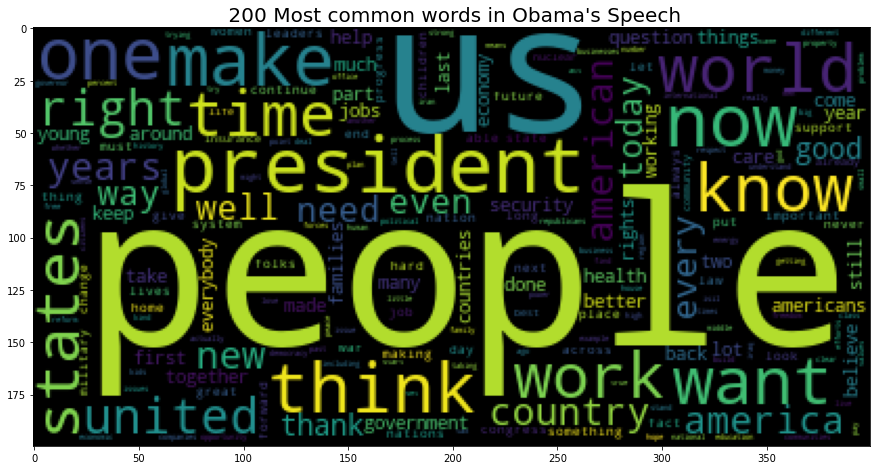

In [ ]:
rvw_cmn= dict(word_count.most_common(200))
wc= WordCloud()
wc.generate_from_frequencies(rvw_cmn);
plt.subplots(figsize= (15, 15));
plt.imshow(wc);
plt.title(" 200 Most common words in Obama's Speech", fontdict= {'fontsize': 20} );

From the wordcloud above, we see that, Obama concentrated his speeches mostly on 'people'. He did not segregate himself from his fellow countrymen, as is also apparent from the word 'us' being used frequently. He also talked about a "new "world" and "job" creation.

Also, as he was campaigning for the elections, the word "president" also frequented. 

We will now do a timeline review, to see the change in his speeches, how the frequented word changed over time.

## Timeline Analysis of Speech

We now try to look into the speeches, based on the time that they were delivered. We try to spearate the speeches in three groups, one at the initial days of his campaign, one near the elections and the other being after his selection as the President. We then try to analyze his speeches, so as to see, how the topic of delivery changed, if any.

In [ ]:
spch_df["date"]= pd.to_datetime(spch_df.date)
spch_df.sort_values(by= 'date', ascending= True, inplace= True )
spch_df.head(3)

,date,header,content,year
0,2004-07-27,2004 DNC Address,"On behalf of the great state of Illinois, cro...",2004
1,2005-01-06,Senate Speech on Ohio Electoral Vote,"Senator Obama: Thank you very much, Mr Presid...",2005
2,2005-06-04,Knox College Commencement,"Good morning President Taylor, Board of Trust...",2005


In [ ]:
print(" Date of first speech: ", spch_df.date[0] )
print(" Date of last speech: ", spch_df.date[len(spch_df.date)- 1] )

 Date of first speech:  2004-07-27 00:00:00
 Date of last speech:  2017-01-20 00:00:00


Creating a "Year" column, which will help us to split the dataframe.

In [ ]:
spch_df["year"] = pd.DatetimeIndex(spch_df.date).year.astype(str)
spch_df.head()

,date,header,content,year
0,2004-07-27,2004 DNC Address,"On behalf of the great state of Illinois, cro...",2004
1,2005-01-06,Senate Speech on Ohio Electoral Vote,"Senator Obama: Thank you very much, Mr Presid...",2005
2,2005-06-04,Knox College Commencement,"Good morning President Taylor, Board of Trust...",2005
3,2005-10-25,Rosa Parks,"Mr President, today the nation mourns a genui...",2005
4,2005-12-15,Senate Floor Speech on the Patriot Act,"Thank you very much, Mr President You know, f...",2005


 Breaking up the speeches into three timelines.

In [ ]:
yr1= (spch_df.year< '2007')
cmpn_tm= pd.DataFrame(spch_df.loc[yr1])

yr2= (spch_df.year>= '2007' )& (spch_df.year<= '2009' )
elc_tm= pd.DataFrame(spch_df.loc[yr2])

yr3= (spch_df.year> '2009')
pres_tm= pd.DataFrame(spch_df.loc[yr3])

 Common: 
 [('us', 44), ('america', 35), ('rights', 34), ('people', 32), ('american', 29), ('act', 29), ('now', 28), ('one', 28), ('states', 25), ('know', 24), ('work', 23), ('country', 23), ('time', 23), ('life', 21), ('john', 21), ('parks', 20), ('make', 20), ('come', 19), ('world', 19), ('right', 19)]


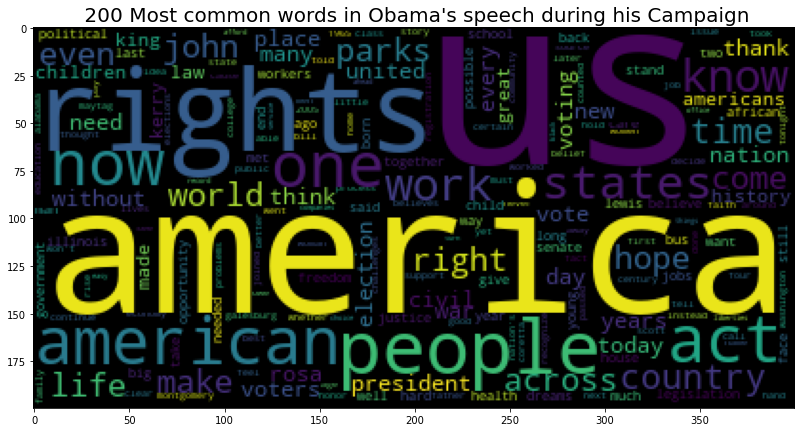

In [ ]:
tokens= [tokenizer.tokenize(x.lower()) for x in cmpn_tm.content]
tokens_no_stopwords= [token for x in tokens for token in x if token not in STOPWORDS]
word_count= Counter(tokens_no_stopwords)
word_count.most_common(20)
print( " Common: \n", word_count.most_common(20) )

rvw_cmn= dict(word_count.most_common(200))
wc= WordCloud()
wc.generate_from_frequencies(rvw_cmn);
plt.subplots(figsize= (15, 7));
plt.imshow(wc);
plt.title(" 200 Most common words in Obama's speech during his Campaign", fontdict= {'fontsize': 20, 'verticalalignment': 'baseline'});

During the initital days of campaign, Obama spoke about "America", stressing on "us", and the "rights" of people.

To be noted, tht word "president" did not occur very frequently, though it was present.

 Common: 
 [('people', 776), ('us', 660), ('now', 520), ('one', 489), ('know', 455), ('new', 438), ('world', 436), ('america', 426), ('time', 424), ('must', 409), ('president', 397), ('american', 376), ('health', 349), ('make', 345), ('care', 320), ('work', 319), ('many', 311), ('want', 291), ('states', 287), ('country', 284)]


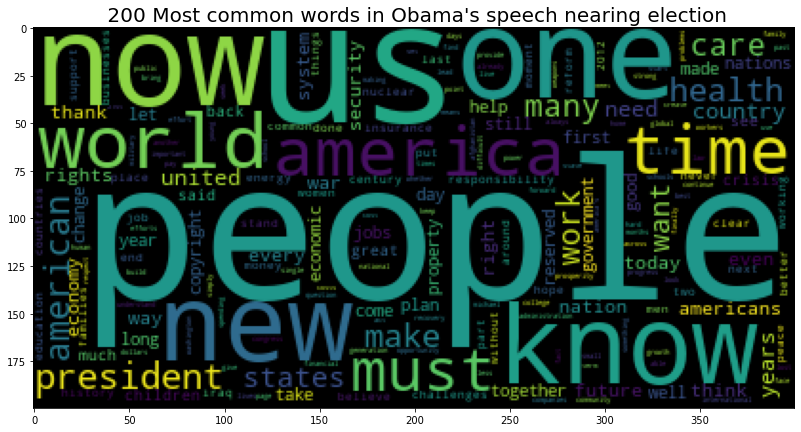

In [ ]:
new_stpwrds= ["q", "e", "yet", "seen", "sure"] 
[STOPWORDS.add(n) for n in new_stpwrds]
tokens= [tokenizer.tokenize(x.lower()) for x in elc_tm.content]
tokens_no_stopwords= [token for x in tokens for token in x if token not in STOPWORDS]
word_count= Counter(tokens_no_stopwords)
print( " Common: \n", word_count.most_common(20) )

rvw_cmn= dict(word_count.most_common(200))
wc= WordCloud()
wc.generate_from_frequencies(rvw_cmn);
plt.subplots(figsize= (15, 7));
plt.imshow(wc);
plt.title(" 200 Most common words in Obama's speech nearing election", fontdict= {'fontsize': 20, 'verticalalignment': 'baseline'});

Nearing election, we see that, there has not been much change in his speeches, as the words "people", "America" still frequented his speeches. He talked about the "world" and the "war" happening in "Iraq" and "Iran". His speech also contained "women" and the "health" of the people.

To note now, the word "president" has moved up in importance in his speeches.

 Common: 
 [('people', 6315), ('us', 4442), ('president', 3846), ('now', 3465), ('one', 3304), ('make', 3265), ('think', 3029), ('want', 2856), ('world', 2616), ('know', 2596), ('work', 2492), ('time', 2410), ('states', 2369), ('united', 2329), ('right', 2291), ('country', 2218), ('america', 2183), ('years', 2166), ('american', 2162), ('new', 2141)]


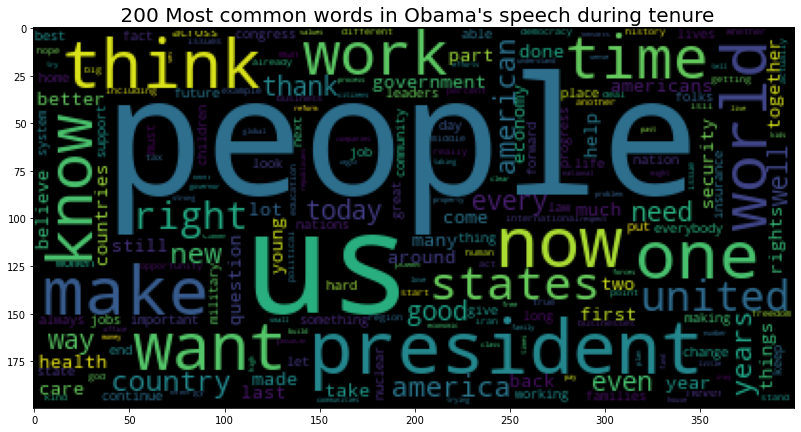

In [ ]:
new_stpwrds= ["without", "said", "see"] 
[STOPWORDS.add(n) for n in new_stpwrds]
tokens= [tokenizer.tokenize(x.lower()) for x in pres_tm.content]
tokens_no_stopwords= [token for x in tokens for token in x if token not in STOPWORDS]
word_count= Counter(tokens_no_stopwords)
print( " Common: \n", word_count.most_common(20) )

rvw_cmn= dict(word_count.most_common(200))
wc= WordCloud()
wc.generate_from_frequencies(rvw_cmn);
plt.subplots(figsize= (15, 7));
plt.imshow(wc);
plt.title(" 200 Most common words in Obama's speech during tenure", fontdict= {'fontsize': 20, 'verticalalignment': 'baseline'});

Even during his tenure, Obama concentrated for the "people", asking them to "now" "think". Apart from "international" situations frequenting his speeches, we see that, he also talked about "family", and "love". Since this collection consists of speeches after his selection as the president, the word "thank" als frequented.

## Lexical Diversity

It is the ratio of total number of words to the number of different unique word stems.

In [ ]:
lex_div= len(set(tokens_no_stopwords_all))/len(tokens_no_stopwords_all)* 100
print(" The lexical diversity of the speeches: ", lex_div)

 The lexical diversity of the speeches:  3.756590509666081


The lexical diversity denotes that, there was quite a variety in Obama's speehes. Though a few words frequented in his speeches, like "people", "America",  but in his tenure, he attended to a lot of other factors.